# Following neural networks book

https://jingyuexing.github.io/Ebook/Machine_Learning/Neural%20Networks%20and%20Deep%20Learning-eng.pdf

# sigmoid neuron

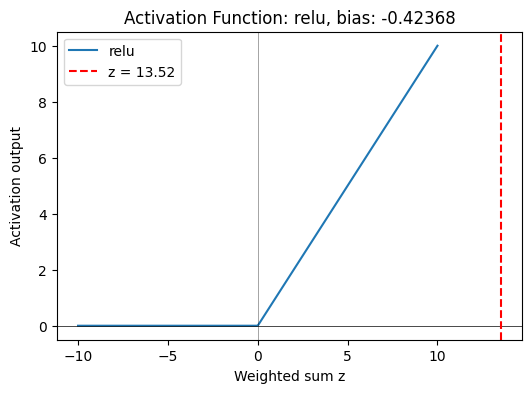

Input: [0.3, 0.5, 20, 0.1]
output: 13.521551759633448
Weights: [-0.44055926 -1.84305584  0.74267285  1.45473747]
Bias: -0.423683381387731
type: relu
activated: False


In [600]:
import numpy as np
import matplotlib.pyplot as plt

class Neuron():
    """A simple neuron class that computes the weighted sum of inputs, adds a bias, and applies an activation function."""
    def __init__(self, n_inputs,weights,bias,activation='lorentzian',plotting=False):
        self.n_inputs = n_inputs
        self.activation = activation
        self.weights = weights
        self.bias = bias
        self.activated=False
        self.plotting=plotting    
    def __call__(self,x):
        """Compute the output of the neuron given input x."""
        self.z = np.dot(x, self.weights) + self.bias
        y = self.activation_curve(self.z) # using activation function to get neuron output
        
        if self.plotting:
            self.plotting_func(z_value=self.z)
        return y

    def activation_curve(self,z_range):
        """Returns the activation curve for the given z_range."""
        if self.activation == 'lorentzian':
            return 1 / (1 + np.exp(-z_range))
        elif self.activation == 'tanh': 
            return np.tanh(z_range)
        elif self.activation == 'relu':
            return np.maximum(0, z_range)
        else:
            raise ValueError("Unsupported activation function")

    def plotting_func(self, z_value=None):
        """Plots the activation function curve and marks current z_value if provided."""
        z_range = np.linspace(-10, 10, 300)
        y_range = self.activation_curve(z_range)

        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(z_range, y_range, label=self.activation)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5,alpha=0.5)

        # If we have a specific z value for the current input, mark it
        if z_value is not None:
            ax.axvline(z_value, color='red', linestyle='--', label=f'z = {z_value:.2f}')
        
        ax.set_title(f"Activation Function: {self.activation}, bias: {self.bias:.5f}")
        ax.set_xlabel("Weighted sum z")
        ax.set_ylabel("Activation output")
        ax.legend()
        plt.show()
    


x=[0.3, 0.5, 20, 0.1]  # Example input
weights=np.random.randn(len(x))  # Example weights
bias=np.random.randn() # Example bias
neuron=Neuron(len(x),weights,bias,activation='relu',plotting=True)

y=neuron(x)
print(f"Input: {x}")
print(f"output: {y}")
print("Weights:", neuron.weights)
print("Bias:", neuron.bias)
print(f"type: {neuron.activation}")
print(f"activated: {neuron.activated}")


# NAND gate

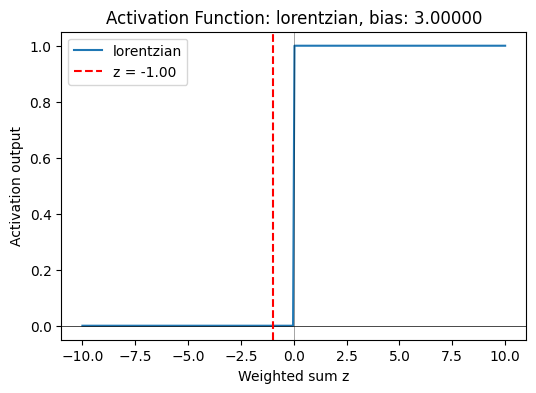

activated:0


In [449]:
class Perceptron(Neuron):
    """A simple perceptron class that inherits from Neuron and implements a step activation function."""
    def __init__(self, n_inputs, weights, bias,plotting=False):
        super().__init__(n_inputs, weights, bias,plotting=plotting)
    
    def activation_curve(self,z_range):
        """Returns the activation curve for the perceptron."""
        return np.where(z_range > 0, 1, 0) # step function
        
    


x=[1,1]
w=[-2,-2]
bias=3
Nand_neuron=Perceptron(len(x),w,bias,plotting=True)
activated=Nand_neuron(x)
print(f'activated:{activated}')
# Nand_neuron.plotting_func(z_value=np.dot(x, w) + bias)

# AND gate

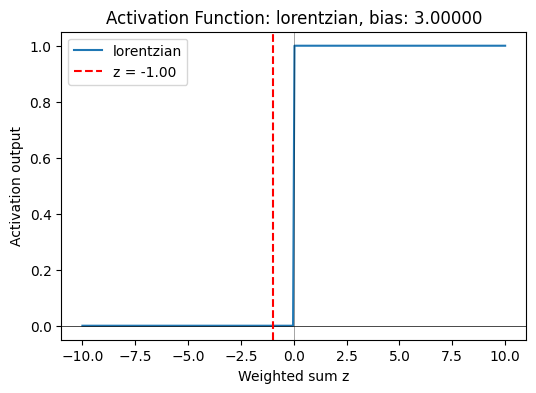

activated: 0


In [450]:
x=[0,1]
NAND1=Perceptron(len(x),[-2,-2],3)
output1=NAND1(x)
NAND2=Perceptron(2,[-2,-2],3,plotting=True)
output2=NAND2([output1,output1])
print(f'activated: {output2}')

# OR gate

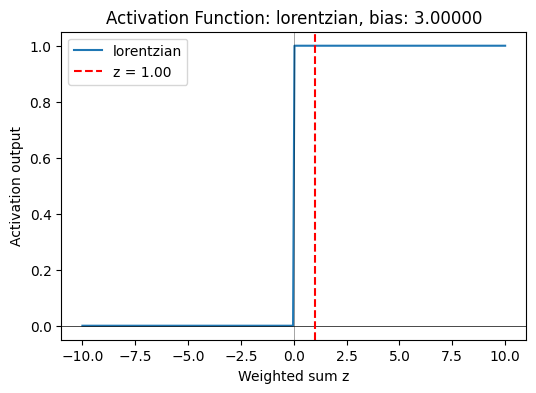

activated: 1


In [451]:
x=[0,1]
NAND1= Perceptron(len(x),[-2,-2],3)
output1=NAND1([x[0],x[0]])
NAND2= Perceptron(2,[-2,-2],3)
output2=NAND2([x[1],x[1]])
NAND3= Perceptron(2,[-2,-2],3,plotting=True)
output3=NAND3([output1,output2])
print(f'activated: {output3}')

# Exercise 1


suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive constant, . show that the behaviour of the network doesn't change.<br>

$\sigma (\textbf{w}\cdot \textbf{x} + b) = \sigma (k\textbf{w}\cdot \textbf{x} + kb)$, where sigma is a step function i.e. 
$ \sigma =\begin{cases}
1, & \text{if } \mathbf{w} \cdot \mathbf{x} + b > 0, \\
0, & \text{otherwise}.
\end{cases}$, and $k>0$

z value: 2.59075415240277
z value: -0.9365478277967222
z value: -1.8778975437398084
z value: 3.138089260607995


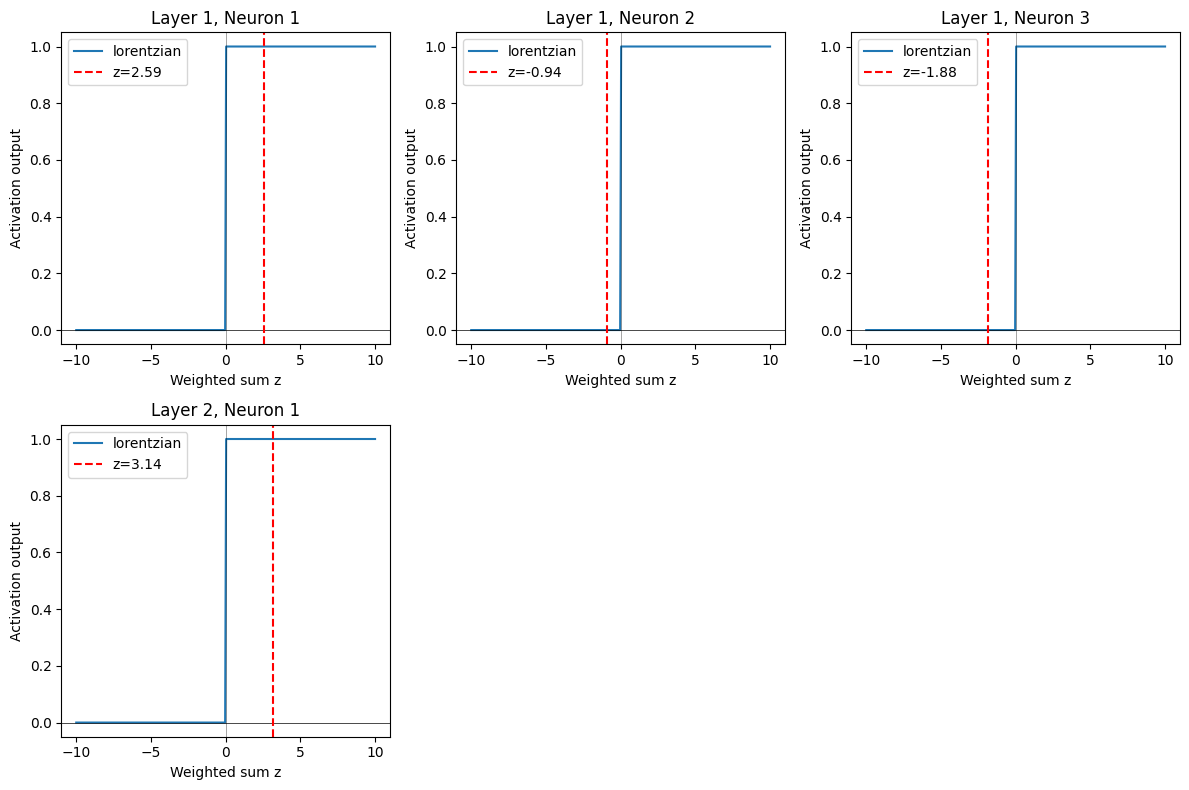

Output of the network: [1]


In [561]:
import numpy as np
class PerceptronLayer:
    """A layer of perceptrons, each perceptron computes a weighted sum of inputs and applies an activation function."""
    def __init__(self,n_neurons,n_inputs_per_neuron,seed=None,plotting=False,multiplier=1,weights=None,biases=None):
        if seed is not None:
            np.random.seed(seed)
        # neurons is an array of perceptions with random weightings and bias
        self.neurons = []
        for n in range(n_neurons):
            # If user provides weights/bias for this neuron, use them
            if weights is not None and biases is not None:
                w = np.array(weights[n])
                b = biases[n]
            else:
                w = np.random.randn(n_inputs_per_neuron) * multiplier
                b = np.random.randn() * multiplier

            self.neurons.append(Perceptron(n_inputs_per_neuron, w, b, plotting=plotting))

    def forward(self,inputs):
        """Brings the inputs through the layer of perceptrons and returns their outputs."""
        outputs=[]
        zs=[]
        for neuron in self.neurons:
            output = neuron(inputs)
            outputs.append(output)
            print('z value:',neuron.z)
            zs.append(neuron.z)
        return outputs,(self.neurons,zs)
class PerceptronNet:
    """A simple neural network composed of multiple layers of perceptrons."""
    def __init__(self,layer_sizes,seed=None,plotting=False,multiplier=1,all_weights=None, all_biases=None):
        """
        layer_sizes: e.g., [2, 3, 1] means:
            - input layer: 2 neurons (input features)
            - hidden layer: 3 perceptrons
            - output layer: 1 perceptron
        """
        if seed is not None:
            np.random.seed(seed)
        self.plotting = plotting
        self.layers=[]
        for i in range(1, len(layer_sizes)):
            layer_weights = all_weights[i-1] if all_weights is not None else None
            layer_biases = all_biases[i-1] if all_biases is not None else None

            self.layers.append(
                PerceptronLayer(layer_sizes[i],
                                layer_sizes[i-1],
                                plotting=False,
                                multiplier=multiplier,
                                weights=layer_weights,
                                biases=layer_biases)
            )

    def forward(self,x):
        """Passes the input through the network layer by layer and returns the final output. stores the y and z values for each neuron in each layer"""
        plot_data=[]
        for layer in self.layers:
            # layer_outputs=[]
            # layer_data=[]
            # print('going forward through layer with',len(layer.neurons),'neurons')
            layer_data=layer.forward(x)

            # for neuron in layer.neurons:
            #     print('x=',x)
            #     y=neuron(x)
            #     print('y=',y)
            #     z=neuron.z
            #     layer_outputs.append(y)
            #     layer_data.append((z,y))
            plot_data.append(layer_data[1])
            x=np.array(layer_data[0])  # Use the outputs of the current layer as inputs for the next layer
        if self.plotting:
            self.plotting_func(plot_data)
        return x
    
    def plotting_func(self,plot_data):
        max_neurons=max([len(layer[0]) for layer in plot_data])
        fig,axes=plt.subplots(len(plot_data),max_neurons,figsize=(12, 8))
        if len(plot_data) == 1:
            axes = [axes]
        if max_neurons == 1:
            axes = [[ax] for ax in axes]

        z_range = np.linspace(-10, 10, 300)
        for i,layer in enumerate(plot_data):
            for n, (neuron,z_value) in enumerate(zip(*layer)):
                ax=axes[i][n]
                y_range= neuron.activation_curve(z_range)
                ax.plot(z_range, y_range, label=neuron.activation)
                ax.axhline(0, color='black', linewidth=0.5)
                ax.axvline(z_value, color='red', linestyle='--', label=f"z={z_value:.2f}")
                ax.axvline(0, color='black', linewidth=0.5,alpha=0.5)
                ax.set_title(f"Layer {i+1}, Neuron {n+1}")
                ax.set_xlabel("Weighted sum z")
                ax.set_ylabel("Activation output")
                ax.legend()
            for empty_col in range(len(layer[0]), max_neurons):
                axes[i][empty_col].axis('off')
        plt.tight_layout()
        plt.show()

net=PerceptronNet([2,3,1],seed=42,multiplier=4,plotting=True)
activations=net.forward(np.array([0,0]))

print("Output of the network:", activations)

# Exercise 2


for the sigmoid neuron, $\sigma = \frac{1}{1+e^{-z}}$, where $z=\textbf{w}\cdot \textbf{x} + b$. This means that for $z'=k\textbf{w}\cdot \textbf{x} + kb, \sigma'=\sigma{z'}$, $\lim_{k \to \infty}\sigma'$ becomes a step function like with the Perceptron.<br>

At exactly z'=0, $\sigma$'=$\frac{1}{2}$ and so the Neuron doesnt act like the perceptron, which would give 0 as the output

In [606]:
class SigmoidNeuronLayer(PerceptronLayer):
    """A layer of sigmoid neurons inherited from perceptrons, each neuron computes a weighted sum of inputs and applies a sigmoid activation function."""
    def __init__(self,n_neurons,n_inputs_per_neuron,seed=None,plotting=False,multiplier=1,weights=None,biases=None):
        if seed is not None:
            np.random.seed(seed)
        self.neurons = []
        # print(weights)
        # print(n_neurons)
        for n in range(n_neurons):
            # If user provides weights/bias for this neuron, use them
            if weights is not None:
                w = np.array(weights[n])
            if biases is not None:
                b = biases[n]
                # print(f"for neuron {n}, using provided weights and bias {w} and {b}")

            else:
                w = np.random.randn(n_inputs_per_neuron) * multiplier
                b = np.random.randn() * multiplier

            self.neurons.append(Neuron(n_inputs_per_neuron, w, b, plotting=plotting, activation='lorentzian'))
class SigmoidNeuronNet(PerceptronNet):
    """A simple neural network composed of multiple layers of sigmoid neurons."""
    """This class is similar to PerceptronNet but uses SigmoidNeuronLayer instead"""
    def __init__(self,layer_sizes,seed=None,plotting=False,multiplier=1, all_weights=None, all_biases=None):
        self.plotting = plotting
        if seed is not None:
            np.random.seed(seed)
        self.layers=[]
        for i in range(1, len(layer_sizes)):
            # print(all_weights[i-1] if all_weights is not None else None)
            layer_weights = all_weights[i-1] if all_weights is not None else None
            layer_biases = all_biases[i-1] if all_biases is not None else None
            self.layers.append(
                SigmoidNeuronLayer(layer_sizes[i],
                                layer_sizes[i-1],
                                plotting=False,
                                multiplier=multiplier,
                                weights=layer_weights,
                                biases=layer_biases)
            )
    


m1=1

net1=SigmoidNeuronNet([2,3,1],seed=42,multiplier=m1,plotting=False)
activations=net1.forward(np.array([0.5,0.67]))
print(f"multiplier: {m1}")
print(f"sigmoid net output: {activations}")

net2=PerceptronNet([2,3,1],seed=42,multiplier=m1,plotting=False)
activations=net2.forward(np.array([0.5,0.67]))
print(f"perceptron net output: {activations}\n")

m2=1000
net1=SigmoidNeuronNet([2,3,1],seed=42,multiplier=m2,plotting=False)
activations=net1.forward(np.array([0.5,0.67]))
print(f"multiplier: {m2}")
print(f"sigmoid net output: {activations}")

net2=PerceptronNet([2,3,1],seed=42,multiplier=m2,plotting=False)
activations=net2.forward(np.array([0.5,0.67]))
print(f"perceptron net output: {activations}")

z value: 0.8034085328216152
z value: 0.37049521019019693
z value: 0.8343132903511925
z value: 0.01782457900618306
multiplier: 1
sigmoid net output: [0.50445603]
z value: 0.8034085328216152
z value: 0.37049521019019693
z value: 0.8343132903511925
z value: -0.14462513123072035
perceptron net output: [0]

z value: 803.4085328216152
z value: 370.495210190197
z value: 834.3132903511926
z value: -144.62513123072037
multiplier: 1000
sigmoid net output: [1.54918599e-63]
z value: 803.4085328216152
z value: 370.495210190197
z value: 834.3132903511926
z value: -144.62513123072037
perceptron net output: [0]


# 4 layer sigmoid neural net


z value: 1.9404068401233154
z value: -1.925472270306321
z value: -0.6493051406312815
z value: -1.2221045079788373
z value: -0.521195905189821
z value: 0.2904800744091971
z value: -1.0302523148136356
z value: -0.46256268899475894
z value: -1.6343664049259643
z value: -0.9399079724906819
z value: 0.06944003489956174
z value: 0.2994773987750211
z value: 1.2693611477231233
z value: 2.4757223257395253


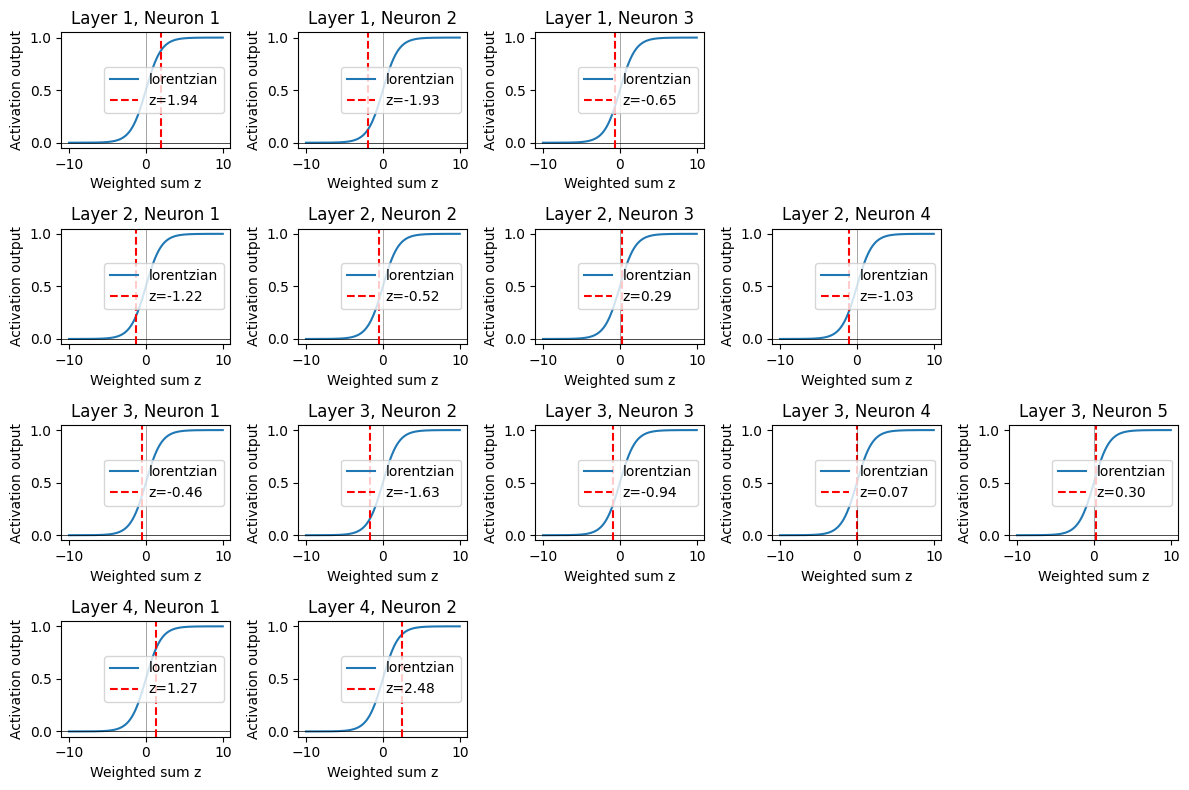

sigmoid net output: [0.78063337 0.92242224]


In [605]:
weights=[[1,0.3,3],
         [7,8,0.1,4],
         [24,63,24,63,12],
         [10,20]]
net=SigmoidNeuronNet([6,3,4,5,2],seed=42,multiplier=1,plotting=True,all_weights=weights)
output=net.forward(np.array([0.5,0.67,0.1,0.2,0.3,0.4]))
print(f"sigmoid net output: {output}")

# Exercise 3

There is a way of determining the bitwise representation of a digit by adding an extra layer to the three-layer network above. The extra layer converts the output from the previous layer into a binary representation, as illustrated in the figure below. Find a set of weights and biases for the new output layer. Assume that the first layers of neurons are such that the correct output in the third layer activation at least 0.9 and incorrect outputs have activation less than 0.01.

In [492]:
import random
layer_weights = [[
    [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5],  # neuron 1
    [0, 0, 0, 0, 0.5, 0.5, 0.5, 0.33, 0, 0],     # neuron 2
    [0, 0, 1, 0.5, 0, 0, 0.5, 0.33, 0, 0],     # neuron 3
    [0, 1, 0, 0.5, 0, 0.5, 0, 0.33, 0, 0.5]      # neuron 4
]]
bias=[-0.1,-0.1,-0.1,-0.1]  # biases for each neuron in the layer

low1, high1 = 0.0, 0.01   # lower range
low2, high2 = 0.99, 1.0   # upper range

numbers = []
n = 10
arr = [0] * n  # start with all zeros
arr[random.randrange(n)] = 1  # pick a random index to set to 1
for x in arr:
    if x < 0.5:  # 50% chance for lower range
        numbers.append(random.uniform(low1, high1))
    else:  # 50% chance for upper range
        numbers.append(random.uniform(low2, high2))
print('Inputted number: ',np.where(np.array(arr)==1)[0][0])
print("Generated numbers:", numbers)

net=PerceptronNet([10,4],seed=42,plotting=False,all_weights=layer_weights, all_biases=[bias])
output=net.forward(numbers)
print(f"sigmoid net output: {output}")

#0000,0001,0010,0011,0110,0111,1000,1001,1010
# 0,1,2,3,4,5,6,7,8,9,10

Inputted number:  6
Generated numbers: [0.0009667802867638787, 0.0066320006346331575, 0.0055960655825073695, 0.0044182719784063365, 0.007312786979913332, 0.0017421197955443757, 0.9926595651089859, 0.004077545374352678, 0.0037180045948272834, 0.004321358790801198]
sigmoid net output: [0 1 1 0]


# Beginnings of gradient decent

training data is from MNIST is first 50,000 images from image data set, with the final 10,000 is validation set.

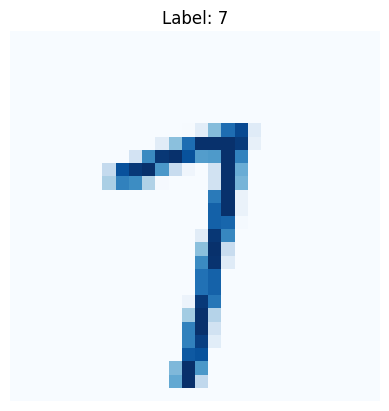

In [102]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[42], cmap="Blues")
plt.title(f"Label: {train_labels[42]}")
plt.axis("off")
plt.show()

class MNISTLoader:
    def __init__(self):
        # Load MNIST data from Keras
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # Normalize and flatten images
        x_train = x_train.reshape(-1, 28*28).astype('float32') / 255.0
        x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0

        # One-hot encode labels
        y_train_oh = to_categorical(y_train, 10)
        y_test_oh = to_categorical(y_test, 10)

        # Split training into training + validation
        validation_size = 10000
        self.validation_data = (x_train[:validation_size], y_train_oh[:validation_size])
        self.validation_data = list(zip(self.validation_data[0], self.validation_data[1]))

        self.training_data = (x_train[validation_size:], y_train_oh[validation_size:])
        self.training_data = list(zip(self.training_data[0], self.training_data[1]))

        self.test_data = list(zip(x_test, y_test_oh))

        # Also store labels as integers for convenience (like Nielsen does)
        self.training_data_int = (x_train[validation_size:], y_train[validation_size:])
        self.validation_data_int = (x_train[:validation_size], y_train[:validation_size])
        self.test_data_int = (x_test, y_test)


In [5]:

# all_weights=np.random.randn(1,4,10) * 0.01
# all_biases=np.random.randn(1,4) * 0.01
# net=SigmoidNeuronNet([10,4],seed=42,plotting=False,all_weights=all_weights, all_biases=all_biases)
# activations=net.forward([0.5,0.67,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
# print(f" net output: {activations}")

mnist_loader = MNISTLoader()
training_data = mnist_loader.training_data
print(training_data[0])

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.    

# writing neural net for learing

whilst the above nets are great for explaination and learning, they are slow, and so we need to employ a more vectorised approach to properly create a net capable of being trained efficiently.

in the previous nets we havent taken full advantage of the idea of dot products and vectors, which is less intuitive but much less complicated

In [90]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


class VectorisedLayer:
    """This method of creating the layer takes advantage of vectors in the np.dot function and then in the sigmoid function to 
    do all the forward prop in one go."""
    def __init__(self, n_inputs, n_neurons):
        self.weights=np.random.randn(n_neurons, n_inputs) # each neuron in the layer has a weight for each input
        self.bias=np.random.randn(n_neurons,1) # each neuron in the layer has its own bias
        self.z=None # this is where the output of the layer before activation function is stored to be used in backprop
        self.a=None # this is where the output of the layer after activation function is stored to be used in backprop

    def forward(self,a_prev):
        self.z= np.dot(self.weights,a_prev) + self.bias
        self.a=sigmoid(self.z)
        return self.a
    
"""
weights has dimentions (number of neurons, number of inputs) so for a layer of 30 neurons leading to a layer of 10, the final layer
would have a weight matrix (10,30)

bias has dimentions (number of neurons,1) so for the same network as above the final layers bias would be (10,1)

the input to the layer is a matrix of dimentions (number of inputs,1) so again for above it would be (30,1)

then z is W @ a + b so that weights and a multiply correctly and then z is of dimentions (10,1) which then adds with bias 

"""

class VectorisedNet:
    def __init__(self,layer_sizes):
        """
        layer_sizes: list of layer sizes, e.g. [784, 30, 10]
        means: input layer 784, one hidden layer of 30, output layer of 10
        """
        self.num_layers=len(layer_sizes)
        print(f'num layers: {self.num_layers}')
        self.layer_sizes=layer_sizes
        self.layers=[VectorisedLayer(self.layer_sizes[i],self.layer_sizes[i+1]) for i in range(self.num_layers-1)]
    
    def forward(self,a):
        """feeds the inputs forward through each layer and then returns the output of the final layer"""
        for layer in self.layers:
            a=layer.forward(a)
        return a

    def backprop(self,x,y):
        """performs back propogation to update weights and biases of all neurons.
        x is the input vector and y is the desired output as a vector i.e. 3 is represented as [0,0,0,1,0,0,0,0,0,0]"""


        # this is forward propogation

        a=x
        activations=[x] # initialises the list of all activation values from all layers with the input as the activation of the first layer
        zs=[] # list of z values from all layers initialised
        for layer in self.layers:
            # print('number of neurons in layer:',layer.weights.shape[0])
            # print('x shape:',a.shape)
            # print('bias shapeL',layer.bias.shape)
            # print('weights shape:',layer.weights.shape)
            z=np.dot(layer.weights,a)+layer.bias
            # print('z shape:',z.shape)
            zs.append(z)
            a=sigmoid(z)
            activations.append(a)
        # print('activations[-1] shape:',activations[-1].shape)
        # print('y shape:',y.shape)
        # print(y)
        # this is back propogation
        grad_weights=[np.zeros_like(layer.weights) for layer in self.layers]
        grad_bias=[np.zeros_like(layer.bias) for layer in self.layers]
        
        delta=(activations[-1]-y)*sigmoid_derivative(zs[-1]) # the error using the quadratic cost function on the final network output
        # print('activation[-2] weights shape:',activations[-2].T.shape)
        # print('delta:',delta)
        grad_weights[-1]=np.dot(delta,activations[-2].T)
        grad_bias[-1]=delta
        # print('grad_weights shape:',grad_weights[-1].shape)
        # print('number of layers:',self.num_layers)
        for l in range(2,self.num_layers):
            z=zs[-l]
            current_sigmoid_derivative=sigmoid_derivative(z)
            # print('l:',l)
            # print('sigmoid derivative shape:',current_sigmoid_derivative.shape)
            # print('old delta shape:',delta.shape)
            # print('layer -l+1 weights transpose shape:',self.layers[-l+1].weights.T.shape)
            # print(current_sigmoid_derivative.shape)
            delta=np.dot(self.layers[-l+1].weights.T,delta)*current_sigmoid_derivative
            # print('new delta shape:',delta.shape)
            # print('activation[-l-1] transpose shape:',activations[-l-1].T.shape)
            grad_weights[-l]=np.dot(delta,activations[-l-1].T)
            grad_bias[-l]=delta
        # print('grad weights: ({},{},{})'.format(len(grad_weights),grad_weights[0].shape,grad_weights[1].shape))

        return grad_weights,grad_bias
    
    def update_mini_batch(self,mini_batch,learning_rate):
        """Update weights and biases"""
        total_grad_weights=[np.zeros(layer.weights.shape) for layer in self.layers]
        total_grad_bias=[np.zeros_like(layer.bias) for layer in self.layers]
        for x,y in mini_batch: # x is the input image, and y is the denary vector representing the correct output
            x = x.reshape(-1, 1)
            y = y.reshape(-1, 1)
            grad_weights,grad_bias=self.backprop(x,y)
            total_grad_weights=[tgw+gw for tgw,gw in zip(total_grad_weights,grad_weights)] # adds the current weight error to the total for each neuron
            total_grad_bias=[tgb+gb for tgb,gb in zip(total_grad_bias,grad_bias)]
        
        m=len(mini_batch)
        for i,layer in enumerate(self.layers):
            layer.weights-=(learning_rate/m)*total_grad_weights[i]
            layer.bias-=(learning_rate/m)*total_grad_bias[i]

    def SGD(self,training_data,epochs,mini_batch_size,learning_rate,test_data=None):
        """runs the stochastic gradient decent training algorithm"""
        # an epoch is a full run through the training data
        n=len(training_data)
        for epoch in range(epochs):
            np.random.shuffle(training_data)
            mini_batches=[training_data[k:k+mini_batch_size] for k in range(0,n,mini_batch_size)] # shuffles the training data and splits it up into minibatches
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch,learning_rate) # runs the backprop alogrithm on the minibatch - averages over the minibatch
            if test_data:
                n_test=len(test_data)
                acc=self.evaluate(test_data)
                print(f"Epoch {epoch+1}: {acc} / {n_test}")
            else:
                print(f"Epoch {epoch+1} complete")
    
    def evaluate(self,test_data):
        """evaluates how many of the test data give the correct output"""
        test_results = [
            (np.argmax(self.forward(x)), np.argmax(y))
            for (x, y) in test_data
        ]
        return sum(int(pred == truth) for pred, truth in test_results)




net=VectorisedNet([784,30,10])
net.SGD(training_data,epochs=10,mini_batch_size=10,learning_rate=3.0)
# test_data=mnist_loader.test_data


num layers: 3
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Epoch 6 complete
Epoch 7 complete
Epoch 8 complete
Epoch 9 complete
Epoch 10 complete


In [98]:
print(np.argmax(net.forward(training_data[1][0].reshape(-1,1)))+1)
print(np.argmax(training_data[1][1].reshape(-1,1))+1)

6
6


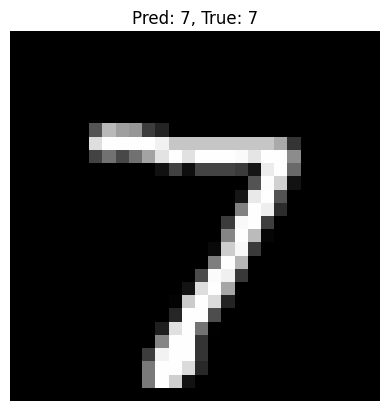

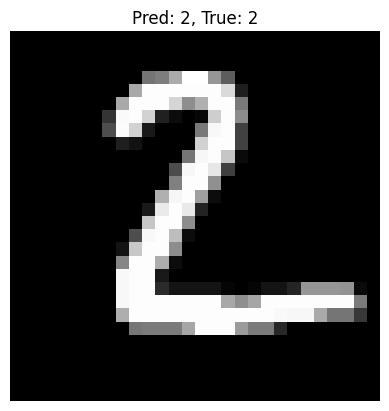

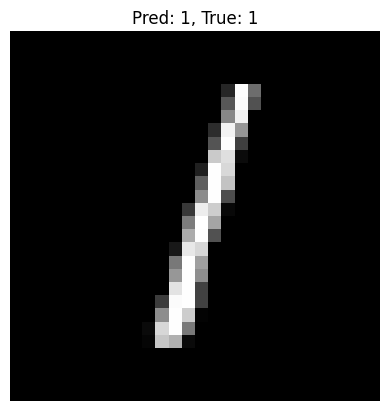

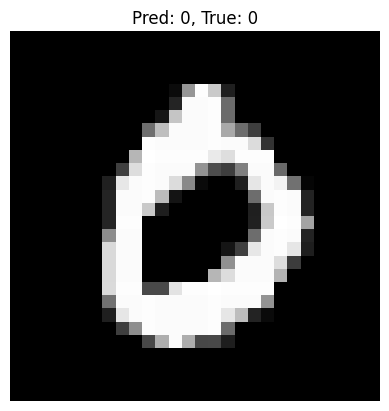

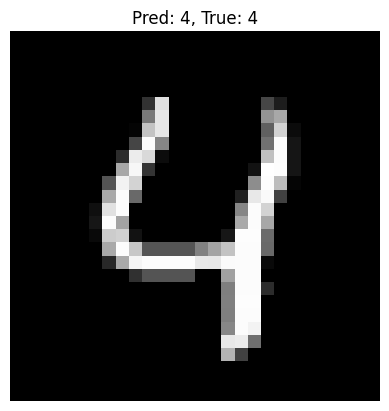

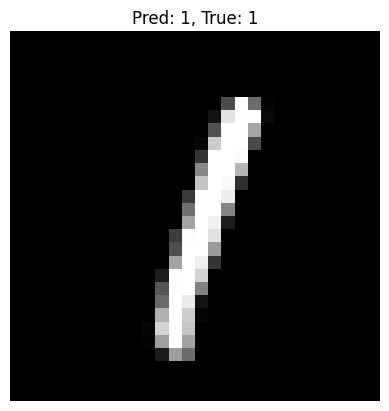

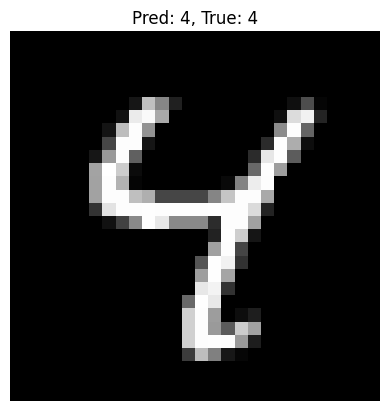

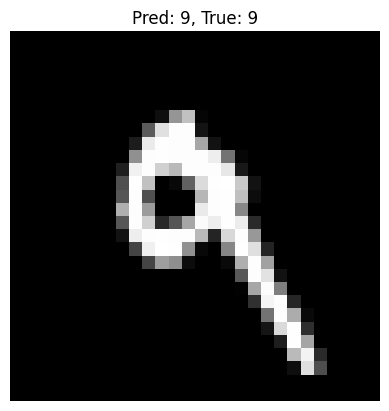

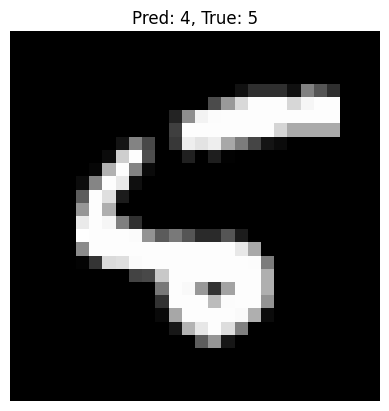

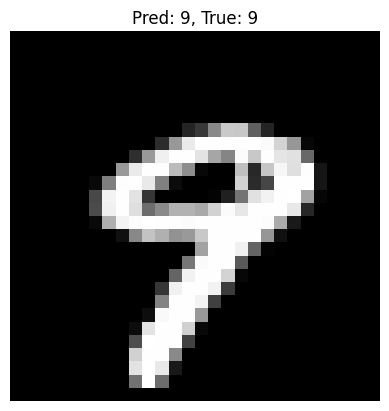

Test Accuracy: 94.18%


In [106]:
def test_network(network, test_data, num_samples=10):
    """
    network: your neural net object with .feedforward(x) method
    test_data: list of tuples (x, y) or (x, y_onehot)
    num_samples: how many images to visualize
    """
    correct = 0

    for i, (x, y) in enumerate(test_data):
        x = x.reshape(-1, 1)  # ensure column vector
        output = network.forward(x)  # final activations, shape (10,1)
        prediction = np.argmax(output)   # predicted class

        # If y is one-hot, convert to integer
        if y.ndim > 0:
            true_label = np.argmax(y)
        else:
            true_label = y

        if prediction == true_label:
            correct += 1

        # Optionally visualize first num_samples images
        if i < num_samples:
            import matplotlib.pyplot as plt
            plt.imshow(x.reshape(28,28), cmap='gray')
            plt.title(f"Pred: {prediction}, True: {true_label}")
            plt.axis('off')
            plt.show()

    accuracy = correct / len(test_data)
    print(f"Test Accuracy: {accuracy*100:.2f}%")


# Assuming you have a MNISTLoader class
loader = MNISTLoader()
test_data = loader.test_data  # (x_test, y_test_onehot)

# network = your neural network object
test_network(net, test_data, num_samples=10)